In [1]:
from glob import glob 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import anndata
import scanpy as sc
import scanpy.external as sce
from ALLCools.clustering import tsne, significant_pc_test, LSI
from ALLCools.plot import *
import seaborn as sns
mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'


In [75]:
indir = '/gale/netapp/entex/CEMBA_RS2/merged/'
# meta = pd.read_csv(f'{indir}matrix/cell_48032_RS2_meta.csv.gz', index_col=0, header=0)
# meta


In [3]:
# meta['L1_annot'].value_counts()

In [3]:
metaall = pd.read_csv(f'{indir}matrix/cell_349658_RS1RS2_obs.csv.gz', index_col=0, header=0)
metaall


/gale/netapp/home/zhoujt/miniconda3/envs/scarches/lib/python3.7/site-packages/ipython-7.28.0-py3.7.egg/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,9,10,11,13,15,16,17,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,mCCCFrac,mCGFrac,mCHFrac,FinalmCReads,DissectionRegion,Plate,Col384,Row384,Slice,Sample,...,L1_annot,L4_annot_LHQ,tsne_0,tsne_1,L4_annot_AIBS,L1_annot_AIBS,L1_annot_LHQ,L4_annot_AIBS_NEW,L1_annot_AIBS_NEW,PlateNormReads
cell,,,,,,,,,,,,,,,,,,,,,
10A_M_1181,0.006661,0.780909,0.023954,1451309.0,RSP-4,CEMBA190423_10A_3,6.0,9.0,10,10A_190423,...,IT-Sup,L4/5 IT CTX Glut,-34.836401,33.452362,Car3 Glut,IT-ET,IT-ET,L4/5 IT CTX Glut,IT-ET,-0.036934
10A_M_1194,0.007622,0.776157,0.025242,1094320.0,RSP-4,CEMBA190423_10A_4,9.0,8.0,10,10A_190423,...,IT-Sup,L4/5 IT CTX Glut,-35.740242,32.879072,L2/3 IT CTX Glut,IT-ET,IT-ET,L4/5 IT CTX Glut,IT-ET,-0.379059
10A_M_1420,0.006917,0.769746,0.022461,1193114.0,RSP-4,CEMBA190423_10A_4,0.0,15.0,10,10A_190423,...,IT-Sup,L4/5 IT CTX Glut,-35.144103,34.212734,Car3 Glut,IT-ET,IT-ET,L4/5 IT CTX Glut,IT-ET,-0.254362
10A_M_1488,0.007816,0.758423,0.029157,1089325.0,RSP-4,CEMBA190423_10A_3,12.0,15.0,10,10A_190423,...,IT-Sup,L4/5 IT CTX Glut,-36.075305,32.632391,L2/3 IT CTX Glut,IT-ET,IT-ET,L4/5 IT CTX Glut,IT-ET,-0.450854
10A_M_1592,0.006649,0.776443,0.022382,1887641.0,RSP-4,CEMBA190525_10A_1,15.0,0.0,10,10A_190525,...,IT-Sup,L4/5 IT CTX Glut,-25.307467,43.354405,Car3 Glut,IT-ET,IT-ET,L4/5 IT CTX Glut,IT-ET,0.395258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool180_Plate9-6-M14-O24,0.004759,0.737593,0.018632,1237195.0,NaN,Pool180_Plate9,NaN,NaN,10D11D12D13B,NaN,...,OLF,L2/3 IT CTX Glut,-41.413977,4.751619,L2/3 IT PPP Glut,IT-ET,IT-ET,L3 IT ENT Glut,IT-ET,0.305202
Pool180_Plate9-6-M14-P11,0.005464,0.759072,0.024842,1103912.0,NaN,Pool180_Plate9,NaN,NaN,10D11D12D13B,NaN,...,OLF,L2/3 IT ENTl/PIR Glut,-36.209743,4.777799,CTXsp/sAMY/PAL Slc17a7 Glut,IT-ET,IT-ET,L2/3 IT ENTl/PIR Glut,IT-ET,0.140754
Pool180_Plate9-6-M14-P12,0.006196,0.792529,0.029565,818886.0,NaN,Pool180_Plate9,NaN,NaN,10D11D12D13B,NaN,...,OLF,CTXsp/sAMY Dcn Glut,-19.050636,12.243637,L2 IT ProS Glut,IT-ET,IT-ET,CTXsp/sAMY Dcn Glut,IT-ET,-0.290136


In [5]:
metaall['DissectionRegion'].value_counts()

TEa,ECT,PERI-1    8234
HY-4              4209
MRN               3458
SC-2              3005
SC-1              2997
                  ... 
LSX-1             1947
DG-3              1888
PTLp              1838
ACB-2             1738
LSX-2             1217
Name: DissectionRegion, Length: 115, dtype: int64

In [7]:
meta = metaall.loc[metaall['Study']=='CEMBA_EpiRetro', ['mCCCFrac', 'mCGFrac', 'mCHFrac', 'FinalmCReads', 'Plate', 'Exp', 'Source', 'Slice', 'Target',
       'Gender', 'L1', 'L2', 'L3', 'L4', 'L1_annot', 'PlateNormReads']]
meta

,mCCCFrac,mCGFrac,mCHFrac,FinalmCReads,Plate,Exp,Source,Slice,Target,Gender,L1,L2,L3,L4,L1_annot,PlateNormReads
cell,,,,,,,,,,,,,,,,
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD001,0.006500,0.775850,0.032027,1090870.0,180117_P1,Tm3C,MOp,3C,SC,male,c14,c14_c6,c14_c6_c0,c14_c6_c0_c0,ET,-0.555116
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD002,0.006709,0.775146,0.034091,1458065.0,180117_P1,Tf3C,MOp,3C,SC,female,c14,c14_c5,c14_c5_c0,c14_c5_c0_c0,ET,-0.136540
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD004,0.007131,0.775895,0.035900,1614993.0,180117_P1,Tm4B,MOp,4B,SC,male,c14,c14_c6,c14_c6_c1,c14_c6_c1_c0,ET,0.010933
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD006,0.006032,0.773345,0.028591,1598778.0,180117_P1,Tf4B,MOp,4B,SC,female,c14,c14_c0,c14_c0_c0,c14_c0_c0_c1,ET,-0.003626
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD007,0.005007,0.773471,0.022022,762007.0,180117_P2,Pm3C,MOp,3C,STR,male,c1,c1_c1,c1_c1_c3,c1_c1_c3_c2,IT-Sup,-1.169393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool180_Plate9-6-M14-O24,0.004759,0.737593,0.018632,1237195.0,Pool180_Plate9,Zf10D11D12D13B,ENT,10D11D12D13B,PFC,female,c4,c4_c3,c4_c3_c1,c4_c3_c1_c2,OLF,0.305202
Pool180_Plate9-6-M14-P11,0.005464,0.759072,0.024842,1103912.0,Pool180_Plate9,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c4,c4_c4_c2,c4_c4_c2_c0,OLF,0.140754
Pool180_Plate9-6-M14-P12,0.006196,0.792529,0.029565,818886.0,Pool180_Plate9,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c6,c4_c6_c1,c4_c6_c1_c0,OLF,-0.290136


In [36]:
# meta.to_csv(f'{indir}matrix/cell_48032_RS2_meta_nooutlier.csv.gz')


In [8]:
count = meta.loc[~meta['L1_annot'].isin(['ASC','OPC','ODC','MGC']), 'Exp'].value_counts()
count = count[count>20]
meta = meta[meta['Exp'].isin(count.index)]
meta


,mCCCFrac,mCGFrac,mCHFrac,FinalmCReads,Plate,Exp,Source,Slice,Target,Gender,L1,L2,L3,L4,L1_annot,PlateNormReads
cell,,,,,,,,,,,,,,,,
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD001,0.006500,0.775850,0.032027,1090870.0,180117_P1,Tm3C,MOp,3C,SC,male,c14,c14_c6,c14_c6_c0,c14_c6_c0_c0,ET,-0.555116
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD002,0.006709,0.775146,0.034091,1458065.0,180117_P1,Tf3C,MOp,3C,SC,female,c14,c14_c5,c14_c5_c0,c14_c5_c0_c0,ET,-0.136540
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD004,0.007131,0.775895,0.035900,1614993.0,180117_P1,Tm4B,MOp,4B,SC,male,c14,c14_c6,c14_c6_c1,c14_c6_c1_c0,ET,0.010933
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD006,0.006032,0.773345,0.028591,1598778.0,180117_P1,Tf4B,MOp,4B,SC,female,c14,c14_c0,c14_c0_c0,c14_c0_c0_c1,ET,-0.003626
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD007,0.005007,0.773471,0.022022,762007.0,180117_P2,Pm3C,MOp,3C,STR,male,c1,c1_c1,c1_c1_c3,c1_c1_c3_c2,IT-Sup,-1.169393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool180_Plate9-6-M14-O24,0.004759,0.737593,0.018632,1237195.0,Pool180_Plate9,Zf10D11D12D13B,ENT,10D11D12D13B,PFC,female,c4,c4_c3,c4_c3_c1,c4_c3_c1_c2,OLF,0.305202
Pool180_Plate9-6-M14-P11,0.005464,0.759072,0.024842,1103912.0,Pool180_Plate9,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c4,c4_c4_c2,c4_c4_c2_c0,OLF,0.140754
Pool180_Plate9-6-M14-P12,0.006196,0.792529,0.029565,818886.0,Pool180_Plate9,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c6,c4_c6_c1,c4_c6_c1_c0,OLF,-0.290136


In [9]:
meta = meta[~meta['L1_annot'].isin(['ASC','OPC','ODC','MGC'])]
meta


,mCCCFrac,mCGFrac,mCHFrac,FinalmCReads,Plate,Exp,Source,Slice,Target,Gender,L1,L2,L3,L4,L1_annot,PlateNormReads
cell,,,,,,,,,,,,,,,,
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD001,0.006500,0.775850,0.032027,1090870.0,180117_P1,Tm3C,MOp,3C,SC,male,c14,c14_c6,c14_c6_c0,c14_c6_c0_c0,ET,-0.555116
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD002,0.006709,0.775146,0.034091,1458065.0,180117_P1,Tf3C,MOp,3C,SC,female,c14,c14_c5,c14_c5_c0,c14_c5_c0_c0,ET,-0.136540
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD004,0.007131,0.775895,0.035900,1614993.0,180117_P1,Tm4B,MOp,4B,SC,male,c14,c14_c6,c14_c6_c1,c14_c6_c1_c0,ET,0.010933
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD006,0.006032,0.773345,0.028591,1598778.0,180117_P1,Tf4B,MOp,4B,SC,female,c14,c14_c0,c14_c0_c0,c14_c0_c0_c1,ET,-0.003626
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD007,0.005007,0.773471,0.022022,762007.0,180117_P2,Pm3C,MOp,3C,STR,male,c1,c1_c1,c1_c1_c3,c1_c1_c3_c2,IT-Sup,-1.169393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool180_Plate9-6-M14-O24,0.004759,0.737593,0.018632,1237195.0,Pool180_Plate9,Zf10D11D12D13B,ENT,10D11D12D13B,PFC,female,c4,c4_c3,c4_c3_c1,c4_c3_c1_c2,OLF,0.305202
Pool180_Plate9-6-M14-P11,0.005464,0.759072,0.024842,1103912.0,Pool180_Plate9,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c4,c4_c4_c2,c4_c4_c2_c0,OLF,0.140754
Pool180_Plate9-6-M14-P12,0.006196,0.792529,0.029565,818886.0,Pool180_Plate9,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c6,c4_c6_c1,c4_c6_c1_c0,OLF,-0.290136


In [10]:
count.shape

(519,)

In [11]:
rs2_subregion_dict = {
    'MOp': ['3C', '4B'],
    'SSp': ['6B', '7B'],
    'ACA': ['3A', '4A', '5A'],
    'AI': ['3D'],
    'AUD': ['9D', '10C'],
    'RSP': ['9A', '10A'],
    'PTLp': ['9B'],
    'VIS': ['11B', '12B'],
    'ENT': ['10D11D12D13B'],
    'CAa': ['8E9H'],
    'CAp': ['10E11E'],
    'DGa': ['8J9J'],
    'DGp': ['10F11F'],
    'MOB': ['1C'],
    'AON': ['2E'],
    'PIRa': ['2D3E4F5G'],
    'PIRp': ['6D7D8D9E'],
    'AMY': ['7H8H9G'],
    'STR': ['4D5E6E'],
    'PAL': ['4H5H6F7F', '6F7F'],
    'THm': ['7G8G'], 
    'THl': ['7E8F'], 
    'THp': ['9K10G'],
    'HY': ['6H7J8K9L'],
    'SC': ['11G12F13C'],
    'MRN': ['10H11H12H'],
    'VTA': ['10J11J'],
    'PAG': ['12G13D'],
    'IC': ['14A'],
    'P': ['12J13E13F14C14D'],
    'MY': ['15C16C17B18B'],
    'CBX': ['14B15B18A']
}


In [12]:
len(rs2_subregion_dict.keys())

32

In [13]:
slice2source = {}
for xx in rs2_subregion_dict:
    for x in rs2_subregion_dict[xx]:
        slice2source[x] = xx

meta['Source'] = meta['Slice'].map(slice2source)


/gale/netapp/home/zhoujt/miniconda3/envs/scarches/lib/python3.7/site-packages/ipykernel-6.4.1-py3.7.egg/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
meta['Source'].astype(str).value_counts()

ACA     2690
MOp     2638
SSp     2414
AUD     2252
PTLp    2183
VIS     2101
AI      2053
VTA     2045
RSP     1822
HY      1538
ENT     1509
AMY     1425
MY      1302
P       1099
THp      910
THl      798
PAL      681
THm      665
MRN      567
SC       507
PIRa     498
PAG      497
PIRp     467
CAp      443
MOB      324
AON      281
DGp      236
STR      194
CBX      186
IC       159
CAa       93
DGa       66
Name: Source, dtype: int64

In [14]:
meta['Comb'] = meta['Source'] + '>' + meta['Target']


/gale/netapp/home/zhoujt/miniconda3/envs/scarches/lib/python3.7/site-packages/ipykernel-6.4.1-py3.7.egg/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
meta['Target'].value_counts().shape

(24,)

In [15]:
meta[['Comb','Gender']].drop_duplicates()['Comb'].value_counts().value_counts()

2    180
1     49
Name: Comb, dtype: int64

In [15]:
reg_ctx = ['MOp','SSp','ACA','AI','RSP','AUD','PTLp','VIS']
meta_ctx = meta[meta['Source'].isin(reg_ctx)]
meta_ctx

,mCCCFrac,mCGFrac,mCHFrac,FinalmCReads,Plate,Exp,Source,Slice,Target,Gender,L1,L2,L3,L4,L1_annot,PlateNormReads,Comb
cell,,,,,,,,,,,,,,,,,
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD001,0.006500,0.775850,0.032027,1090870.0,180117_P1,Tm3C,MOp,3C,SC,male,c14,c14_c6,c14_c6_c0,c14_c6_c0_c0,ET,-0.555116,MOp>SC
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD002,0.006709,0.775146,0.034091,1458065.0,180117_P1,Tf3C,MOp,3C,SC,female,c14,c14_c5,c14_c5_c0,c14_c5_c0_c0,ET,-0.136540,MOp>SC
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD004,0.007131,0.775895,0.035900,1614993.0,180117_P1,Tm4B,MOp,4B,SC,male,c14,c14_c6,c14_c6_c1,c14_c6_c1_c0,ET,0.010933,MOp>SC
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD006,0.006032,0.773345,0.028591,1598778.0,180117_P1,Tf4B,MOp,4B,SC,female,c14,c14_c0,c14_c0_c0,c14_c0_c0_c1,ET,-0.003626,MOp>SC
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD007,0.005007,0.773471,0.022022,762007.0,180117_P2,Pm3C,MOp,3C,STR,male,c1,c1_c1,c1_c1_c3,c1_c1_c3_c2,IT-Sup,-1.169393,MOp>STR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool179_Plate6-6-M9-K11,0.005236,0.775265,0.022725,642106.0,Pool179_Plate6,Zm3D,AI,3D,PFC,male,c11,c11_c5,c11_c5_c1,c11_c5_c1_c0,CGE,-0.503011,AI>PFC
Pool179_Plate6-6-M9-K12,0.005660,0.798764,0.026194,622678.0,Pool179_Plate6,Zm3D,AI,3D,PFC,male,c6,c6_c2,c6_c2_c1,c6_c2_c1_c0,MGE,-0.547337,AI>PFC
Pool179_Plate6-6-M9-L11,0.004467,0.743484,0.018166,1166215.0,Pool179_Plate6,Zm3D,AI,3D,PFC,male,c1,c1_c0,c1_c0_c5,c1_c0_c5_c1,IT-Sup,0.357939,AI>PFC


In [16]:
count = meta_ctx.groupby(['Exp', 'L1_annot'])['L1'].count().unstack().fillna(0)
count

L1_annot,AMY,AMY-CNU,CA1,CA2-CA3,CB,CGE,CLA,CT_L6b,ET,IT-Deep,...,MB,MGE,MSN-D1,NP,OLF,OLF-GC,RHP,RSP,Subcortical,TH-Exc
Exp,,,,,,,,,,,,,,,,,,,,,
Af12B,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,3.0,5.0,...,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
Af3D,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,2.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Af4A,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,11.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Af5A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Af6B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wm7B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,59.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Wm9B,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,39.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zf3D,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [17]:
count['Total'] = count.sum(axis=1)
count = count[['CGE','MGE','CT_L6b','IT-Sup','IT-Deep','ET','Total']]


In [18]:
rs1_subregion_dict = {
    "MOp": ["MOp-2", "MOp-3"],
    "SSp": ["SSp-3", "SSp-4"],
    "ACA": ["PFC-2", "ACA-1", "ACA-2"],
    "AI": ["AI"],
    "RSP": ["RSP-3", "RSP-4"],
    "AUD": ["AUD-1", "AUD-2"],
    "PTLp": ["PTLp"],
    "VIS": ["VIS-2", "VIS-3"],
    "ENT": ["RHP-1", "RHP-2", "RHP-3", "RHP-5"],
    "CAa": ["CA-i", "CA-ii"],
    "CAp": ["CA-iii", "CA-iv"],
    "DGa": ["DG-1", "DG-2"],
    "DGp": ["DG-3", "DG-4"],
    "MOB": ["MOB"],
    "AON": ["AON"],
    "PIRa": ["PIR-1", "PIR-2", "PIR-3", "PIR-4"],
    "PIRp": ["PIR-5", "PIR-6", "PIR-7", "PIR-8"],
    "AMY": ["AMY-1", "AMY-2", "AMY-3"],
    "STR": ["CP-1", "CP-2", "CP-3"],
    "PAL": ["PAL-1", "PAL-2", "PAL-3", "GP"],
    "THm": ["TH-2", "TH-4"],
    "THl": ["TH-1", "TH-3"],
    "THp": ["TH-5", "TH-6", "TH-7"],
    "HY": ["HY-1", "HY-2", "HY-3", "HY-4"],
    "SC": ["SC-1", "SC-2", "SC-3"],
    "MRN": ["PAG-3", "PAG-4", "MRN"],
    "VTA": ["VTA-1", "VTA-2"],
    "PAG": ["PAG-1", "PAG-2"],
    "IC": ["IC-1"],
    "P": ["PRN-1", "PRN-2", "PRN-3", "PRN-4", "PCG"],
    "MY": ["MY-1", "MY-2", "MY-3", "MY-4"],
    "CBX": ["CB-1", "CB-2", "CB-5"],
}


In [19]:
tmp = metaall.loc[metaall['DissectionRegion'].isin(np.concatenate([rs1_subregion_dict[xx] for xx in reg_ctx]))]


In [20]:
slice2source = {}
for xx in rs1_subregion_dict:
    for x in rs1_subregion_dict[xx]:
        slice2source[x] = xx

tmp['SubRegion'] = tmp['DissectionRegion'].map(slice2source)
tmp['SubRegion'].value_counts()


/gale/netapp/home/zhoujt/miniconda3/envs/scarches/lib/python3.7/site-packages/ipykernel-6.4.1-py3.7.egg/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ACA     7325
MOp     5144
VIS     4797
AUD     4708
SSp     4654
RSP     4361
AI      2337
PTLp    1838
Name: SubRegion, dtype: int64

In [21]:
count_rs1 = tmp.groupby(['SubRegion', 'L1_annot'])['L1'].count().unstack().fillna(0)
count_rs1

L1_annot,AMY,ASC,CA1,CA2-CA3,CGE,CLA,CNU-Foxp2,CT_L6b,ET,GP-CNU,...,MSN-D2,NP,ODC,OLF,OLF-GC,OPC,RHP,RSP,Subcortical,TH
SubRegion,,,,,,,,,,,,,,,,,,,,,
ACA,0.0,112.0,0.0,51.0,281.0,0.0,0.0,1555.0,643.0,1.0,...,0.0,302.0,121.0,2.0,3.0,46.0,0.0,64.0,4.0,0.0
AI,1.0,68.0,0.0,0.0,75.0,158.0,0.0,409.0,170.0,1.0,...,0.0,77.0,43.0,33.0,0.0,26.0,0.0,0.0,1.0,0.0
AUD,0.0,79.0,2.0,0.0,139.0,274.0,2.0,951.0,113.0,0.0,...,14.0,77.0,259.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0
MOp,0.0,67.0,0.0,0.0,280.0,22.0,0.0,1050.0,201.0,0.0,...,1.0,141.0,118.0,0.0,0.0,18.0,0.0,0.0,1.0,0.0
PTLp,0.0,29.0,0.0,0.0,37.0,0.0,0.0,308.0,69.0,0.0,...,0.0,34.0,131.0,0.0,1.0,12.0,0.0,9.0,0.0,0.0
RSP,0.0,51.0,5.0,1.0,108.0,0.0,0.0,714.0,169.0,0.0,...,0.0,159.0,249.0,7.0,0.0,15.0,1.0,1924.0,0.0,2.0
SSp,0.0,118.0,0.0,0.0,156.0,5.0,0.0,967.0,130.0,0.0,...,0.0,122.0,133.0,0.0,0.0,34.0,0.0,1.0,0.0,0.0
VIS,0.0,67.0,0.0,0.0,85.0,46.0,0.0,922.0,225.0,0.0,...,0.0,50.0,196.0,0.0,1.0,35.0,0.0,21.0,0.0,0.0


In [22]:
exp2source = meta_ctx[['Exp','Source']].drop_duplicates().set_index('Exp')['Source'].to_dict()
exp2source

{'Tm3C': 'MOp',
 'Tf3C': 'MOp',
 'Tm4B': 'MOp',
 'Tf4B': 'MOp',
 'Pm3C': 'MOp',
 'Pf3C': 'MOp',
 'Pf4B': 'MOp',
 'Pm4B': 'MOp',
 'Bm3C_rep1': 'MOp',
 'Bm4B_rep1': 'MOp',
 'Bm4B_rep2': 'MOp',
 'Tm6B': 'SSp',
 'Tm7B': 'SSp',
 'Tf6B': 'SSp',
 'Tf7B': 'SSp',
 'Bm3C_rep2': 'MOp',
 'Pm6B': 'SSp',
 'Pm7B': 'SSp',
 'Pf6B': 'SSp',
 'Pf7B': 'SSp',
 'Pm5A': 'ACA',
 'Pf4A': 'ACA',
 'Pf5A': 'ACA',
 'Pm4A': 'ACA',
 'Pm3D': 'AI',
 'Pf3D': 'AI',
 'Pm9D': 'AUD',
 'Pm10C': 'AUD',
 'Pf9D': 'AUD',
 'Pf10C': 'AUD',
 'Pm10A': 'RSP',
 'Pf9A': 'RSP',
 'Pm9A': 'RSP',
 'Pf10A': 'RSP',
 'Pf9B': 'PTLp',
 'Pm9B': 'PTLp',
 'Pm11B': 'VIS',
 'Pf11B': 'VIS',
 'Pf12B': 'VIS',
 'Pm12B': 'VIS',
 'Bf4B': 'MOp',
 'Rf4A': 'ACA',
 'Rm5A': 'ACA',
 'Bf3C': 'MOp',
 'Rf5A': 'ACA',
 'Vm4A': 'ACA',
 'Vf4A': 'ACA',
 'Vf5A': 'ACA',
 'Vm5A': 'ACA',
 'Cf3D': 'AI',
 'Cm3D': 'AI',
 'Vf3D': 'AI',
 'Rm3D': 'AI',
 'Rf3D': 'AI',
 'Tm4A': 'ACA',
 'Tf4A': 'ACA',
 'Tf5A': 'ACA',
 'Tm5A': 'ACA',
 'Tm3D': 'AI',
 'Tf3D': 'AI',
 'Tm9D': 'AUD',
 'T

In [23]:
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests as FDR


In [35]:
pvfisher = []
pvbinom = []
fc = []
for k,xx in zip(count.index, count.values):
    obs_iit = sum([xx[0],xx[1],xx[3],xx[4]])
    obs_et = xx[5]
    obs_ict = sum([xx[0],xx[1],xx[2]])
    obs_it = sum([xx[3],xx[4]])
    
    yy = count_rs1.loc[exp2source[k], ['CGE','MGE','CT_L6b','IT-Sup','IT-Deep','ET']]
    exp_iit = sum([yy[0],yy[1],yy[3],yy[4]])
    exp_et = yy[5]
    exp_ict = sum([yy[0],yy[1],yy[2]])
    exp_it = sum([yy[3],yy[4]])    
    pvfisher.append([stats.fisher_exact([[obs_et, obs_iit], [exp_et, exp_iit]])[1], 
                     stats.fisher_exact([[obs_it, obs_ict], [exp_it, exp_ict]])[1]
                    ])
    pvbinom.append([stats.binom(obs_et+obs_iit, exp_et/(exp_et+exp_iit)).sf(obs_et-1),
                    stats.binom(obs_it+obs_ict, exp_et/(exp_it+exp_ict)).sf(obs_it-1),
                   ])
#     fc.append([(obs_et+1)/(obs_iit+1)/(exp_et+1)*(exp_iit+1), 
#                (obs_it+1)/(obs_ict+1)/(exp_it+1)*(exp_ict+1)])
    if obs_iit==0:
        if obs_et>0:
            fcet = 10
        else:
            fcet = 0
    else:
        fcet = obs_et/obs_iit/exp_et*exp_iit
    if obs_ict==0:
        if obs_it>0:
            fcit = 10
        else:
            fcit = 0
    else:
        fcit = obs_it/obs_ict/exp_it*exp_ict
#     if (obs_et+obs_iit)==0:
#         fcet = 0
#     else:
#         fcet = (obs_et)/(obs_et+obs_iit)/(exp_et+1)*(exp_et+exp_iit)
#     if (obs_it+obs_ict)==0:
#         fcit = 0
#     else:
#         fcit = (obs_it)/(obs_it+obs_ict)/(exp_it+1)*(exp_it+exp_ict)
    fc.append([fcet, fcit])

pvfisher = np.array(pvfisher)
pvbinom = np.array(pvbinom)
fc = np.array(fc)


In [36]:
count['ET_FDR_fisher'] = FDR(pvfisher[:,0], 0.01, 'fdr_bh')[1]
count['ET_FDR_binom'] = FDR(pvbinom[:,0], 0.01, 'fdr_bh')[1]
count['IT_FDR_fisher'] = FDR(pvfisher[:,1], 0.01, 'fdr_bh')[1]
count['IT_FDR_binom'] = FDR(pvbinom[:,1], 0.01, 'fdr_bh')[1]
count['ET_ratio'] = fc[:,0].copy()
count['IT_ratio'] = fc[:,1].copy()



In [133]:
# count['ET_ratio'] = count['ET'] / count[['CGE','MGE','IT-Sup','IT-Deep']].sum(axis=1)
# count['IT_ratio'] = count[['IT-Sup','IT-Deep']].sum(axis=1) / count[['CGE','MGE','CT_L6b']].sum(axis=1)


In [37]:
count.loc[(count['IT_ratio']>10), 'IT_ratio'] = 10
count.loc[(count['ET_ratio']>10), 'ET_ratio'] = 10
count = count.fillna(0)
count

L1_annot,CGE,MGE,CT_L6b,IT-Sup,IT-Deep,ET,Total,ET_FDR_fisher,ET_FDR_binom,IT_FDR_fisher,IT_FDR_binom,ET_ratio,IT_ratio,Target,TargetGroup
Exp,,,,,,,,,,,,,,,
Af12B,1.0,4.0,4.0,10.0,5.0,3.0,30.0,3.382427e-01,4.201804e-01,7.624765e-01,1.589370e-13,2.099333,0.784562,MOp,IT
Af3D,0.0,0.0,0.0,3.0,23.0,2.0,55.0,8.828646e-01,1.000000e+00,1.090956e-05,1.335492e-26,0.593213,10.000000,MOp,IT
Af4A,0.0,1.0,0.0,12.0,11.0,2.0,27.0,7.347311e-01,1.000000e+00,3.752450e-04,2.778155e-21,0.561690,10.000000,MOp,IT
Af5A,0.0,0.0,2.0,23.0,10.0,4.0,39.0,1.000000e+00,1.000000e+00,2.987274e-05,1.753715e-29,0.817004,10.000000,MOp,IT
Af6B,0.0,0.0,6.0,43.0,17.0,1.0,67.0,6.810731e-01,1.000000e+00,3.990108e-06,2.367084e-81,0.390385,5.610895,MOp,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wm7B,0.0,2.0,2.0,9.0,1.0,59.0,74.0,1.036759e-63,1.473196e-68,8.697112e-01,1.581064e-12,10.000000,1.402724,MY,ET
Wm9B,1.0,0.0,1.0,3.0,1.0,39.0,45.0,1.914565e-39,2.807533e-43,1.000000e+00,7.044813e-05,10.000000,0.838527,MY,ET
Zf3D,0.0,1.0,0.0,8.0,6.0,0.0,21.0,5.650450e-01,1.000000e+00,1.334022e-02,1.644807e-13,0.000000,9.131604,PFC,IT


In [27]:
count.loc[(count['IT_ratio']>10), 'IT_ratio'] = 10
count.loc[(count['ET_ratio']>10), 'ET_ratio'] = 10
count = count.fillna(0)
count

/gale/netapp/home/zhoujt/miniconda3/envs/scarches/lib/python3.7/site-packages/pandas-1.3.3-py3.7-linux-x86_64.egg/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


L1_annot,CGE,MGE,CT_L6b,IT-Sup,IT-Deep,ET,Total,ET_FDR_fisher,ET_FDR_binom,IT_FDR_fisher,IT_FDR_binom,ET_ratio,IT_ratio
Exp,,,,,,,,,,,,,
Af12B,1.0,4.0,4.0,10.0,5.0,3.0,30.0,3.382427e-01,4.201804e-01,7.624765e-01,1.589370e-13,2.654867,0.753485
Af3D,0.0,0.0,0.0,3.0,23.0,2.0,55.0,8.828646e-01,1.000000e+00,1.090956e-05,1.335492e-26,0.852502,10.000000
Af4A,0.0,1.0,0.0,12.0,11.0,2.0,27.0,7.347311e-01,1.000000e+00,3.752450e-04,2.778155e-21,0.807764,7.868465
Af5A,0.0,0.0,2.0,23.0,10.0,4.0,39.0,1.000000e+00,1.000000e+00,2.987274e-05,1.753715e-29,0.989907,7.431328
Af6B,0.0,0.0,6.0,43.0,17.0,1.0,67.0,6.810731e-01,1.000000e+00,3.990108e-06,2.367084e-81,0.762358,4.890982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wm7B,0.0,2.0,2.0,9.0,1.0,59.0,74.0,1.036759e-63,1.473196e-68,8.697112e-01,1.581064e-12,10.000000,1.234772
Wm9B,1.0,0.0,1.0,3.0,1.0,39.0,45.0,1.914565e-39,2.807533e-43,1.000000e+00,7.044813e-05,10.000000,0.699686
Zf3D,0.0,1.0,0.0,8.0,6.0,0.0,21.0,5.650450e-01,1.000000e+00,1.334022e-02,1.644807e-13,0.479532,4.894434


In [28]:
# tarcolor = pd.read_csv('/gale/netapp/home/zhoujt/project/CEMBA/RS2/target_id.txt', header=1, index_col=None, sep='\t')
# tarall = tarcolor.columns[-1:].append(tarcolor.columns[:-1])
tarall = ['PFC', 'MOp', 'SSp', 'ACA', 'AI', 'AUDp', 'RSP', 'PTLp', 'VISp', 
          'ENT', 'HPF', 'MOB', 'PIR', 'AMY', 'STR', 'PAL', 
          'TH', 'HY', 'SC', 'VTA', 'P', 'MY', 
          'CBN', 'CBX']
tarall

['PFC',
 'MOp',
 'SSp',
 'ACA',
 'AI',
 'AUDp',
 'RSP',
 'PTLp',
 'VISp',
 'ENT',
 'HPF',
 'MOB',
 'PIR',
 'AMY',
 'STR',
 'PAL',
 'TH',
 'HY',
 'SC',
 'VTA',
 'P',
 'MY',
 'CBN',
 'CBX']

In [29]:
tar_it = [xx for xx in ['PFC', 'MOp', 'SSp', 'ACA', 'AI', 'AUDp', 'RSP', 'PTLp', 'VISp', 'ENT', 'PIR', 'AMY', 'STR'] if (xx in meta['Target'].values)]
tar_et = [xx for xx in ['TH', 'HY', 'SC', 'VTA', 'P', 'MY'] if (xx in meta['Target'].values)]
print(tar_it, tar_et)


['PFC', 'MOp', 'SSp', 'ACA', 'AI', 'AUDp', 'RSP', 'PTLp', 'VISp', 'ENT', 'PIR', 'AMY', 'STR'] ['TH', 'HY', 'SC', 'VTA', 'P', 'MY']


In [30]:
exp2target = meta_ctx[['Exp','Target']].drop_duplicates().set_index('Exp')['Target'].to_dict()
exp2target


{'Tm3C': 'SC',
 'Tf3C': 'SC',
 'Tm4B': 'SC',
 'Tf4B': 'SC',
 'Pm3C': 'STR',
 'Pf3C': 'STR',
 'Pf4B': 'STR',
 'Pm4B': 'STR',
 'Bm3C_rep1': 'SSp',
 'Bm4B_rep1': 'SSp',
 'Bm4B_rep2': 'SSp',
 'Tm6B': 'SC',
 'Tm7B': 'SC',
 'Tf6B': 'SC',
 'Tf7B': 'SC',
 'Bm3C_rep2': 'SSp',
 'Pm6B': 'STR',
 'Pm7B': 'STR',
 'Pf6B': 'STR',
 'Pf7B': 'STR',
 'Pm5A': 'STR',
 'Pf4A': 'STR',
 'Pf5A': 'STR',
 'Pm4A': 'STR',
 'Pm3D': 'STR',
 'Pf3D': 'STR',
 'Pm9D': 'STR',
 'Pm10C': 'STR',
 'Pf9D': 'STR',
 'Pf10C': 'STR',
 'Pm10A': 'STR',
 'Pf9A': 'STR',
 'Pm9A': 'STR',
 'Pf10A': 'STR',
 'Pf9B': 'STR',
 'Pm9B': 'STR',
 'Pm11B': 'STR',
 'Pf11B': 'STR',
 'Pf12B': 'STR',
 'Pm12B': 'STR',
 'Bf4B': 'SSp',
 'Rf4A': 'TH',
 'Rm5A': 'TH',
 'Bf3C': 'SSp',
 'Rf5A': 'TH',
 'Vm4A': 'P',
 'Vf4A': 'P',
 'Vf5A': 'P',
 'Vm5A': 'P',
 'Cf3D': 'ACA',
 'Cm3D': 'ACA',
 'Vf3D': 'P',
 'Rm3D': 'TH',
 'Rf3D': 'TH',
 'Tm4A': 'SC',
 'Tf4A': 'SC',
 'Tf5A': 'SC',
 'Tm5A': 'SC',
 'Tm3D': 'SC',
 'Tf3D': 'SC',
 'Tm9D': 'SC',
 'Tm10C': 'SC',
 'Tf10C': 

In [38]:
count['Target'] = count.index.map(exp2target)
count['TargetGroup'] = 'Others'
count.loc[count['Target'].isin(tar_it), 'TargetGroup'] = 'IT'
count.loc[count['Target'].isin(tar_et), 'TargetGroup'] = 'ET'
count

L1_annot,CGE,MGE,CT_L6b,IT-Sup,IT-Deep,ET,Total,ET_FDR_fisher,ET_FDR_binom,IT_FDR_fisher,IT_FDR_binom,ET_ratio,IT_ratio,Target,TargetGroup
Exp,,,,,,,,,,,,,,,
Af12B,1.0,4.0,4.0,10.0,5.0,3.0,30.0,3.382427e-01,4.201804e-01,7.624765e-01,1.589370e-13,2.099333,0.784562,MOp,IT
Af3D,0.0,0.0,0.0,3.0,23.0,2.0,55.0,8.828646e-01,1.000000e+00,1.090956e-05,1.335492e-26,0.593213,10.000000,MOp,IT
Af4A,0.0,1.0,0.0,12.0,11.0,2.0,27.0,7.347311e-01,1.000000e+00,3.752450e-04,2.778155e-21,0.561690,10.000000,MOp,IT
Af5A,0.0,0.0,2.0,23.0,10.0,4.0,39.0,1.000000e+00,1.000000e+00,2.987274e-05,1.753715e-29,0.817004,10.000000,MOp,IT
Af6B,0.0,0.0,6.0,43.0,17.0,1.0,67.0,6.810731e-01,1.000000e+00,3.990108e-06,2.367084e-81,0.390385,5.610895,MOp,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wm7B,0.0,2.0,2.0,9.0,1.0,59.0,74.0,1.036759e-63,1.473196e-68,8.697112e-01,1.581064e-12,10.000000,1.402724,MY,ET
Wm9B,1.0,0.0,1.0,3.0,1.0,39.0,45.0,1.914565e-39,2.807533e-43,1.000000e+00,7.044813e-05,10.000000,0.838527,MY,ET
Zf3D,0.0,1.0,0.0,8.0,6.0,0.0,21.0,5.650450e-01,1.000000e+00,1.334022e-02,1.644807e-13,0.000000,9.131604,PFC,IT


In [32]:
count['TargetGroup'].value_counts()

IT    186
ET    100
Name: TargetGroup, dtype: int64

In [214]:
# selexp = np.concatenate([count.index[(count['TargetGroup']=='IT') & (count['IT_FDR_fisher']<0.05) & (count['IT_ratio']>3)],
#                          count.index[(count['TargetGroup']=='ET') & (count['ET_FDR_fisher']<0.01) & (count['ET_ratio']>5)],
#                    ])
selexp = np.concatenate([count.index[(count['TargetGroup']=='IT') & (count['IT_FDR_binom']<0.001) & (count['IT_ratio']>3)],
                         count.index[(count['TargetGroup']=='ET') & (count['ET_FDR_binom']<0.001) & (count['ET_ratio']>8)],
                   ])
print(len(selexp)/(count['TargetGroup']!='Others').sum())
print(count.loc[count.index.isin(selexp), 'Total'].sum()/count.loc[(count['TargetGroup']!='Others'), 'Total'].sum())


0.8881118881118881
0.911364512752713


In [215]:
# selexp = np.concatenate([count.index[(count['TargetGroup']=='IT') & (count['IT_FDR_fisher']<0.05) & (count['IT_ratio']>3)],
#                          count.index[(count['TargetGroup']=='ET') & (count['ET_FDR_fisher']<0.01) & (count['ET_ratio']>5)],
#                          count.index[(count['TargetGroup']=='Others')]
#                    ])
selexp = np.concatenate([count.index[(count['TargetGroup']=='IT') & (count['IT_FDR_binom']<0.001) & (count['IT_ratio']>3)],
                         count.index[(count['TargetGroup']=='ET') & (count['ET_FDR_binom']<0.001) & (count['ET_ratio']>8)],
                         count.index[(count['TargetGroup']=='Others')]
                   ])
print(len(selexp), count.shape[0])


254 286


In [39]:
# selexp = np.concatenate([count.index[(count['TargetGroup']=='IT') & (count['IT_FDR_fisher']<0.05) & (count['IT_ratio']>3)],
#                          count.index[(count['TargetGroup']=='ET') & (count['ET_FDR_fisher']<0.01) & (count['ET_ratio']>5)],
#                    ])
selexp = np.concatenate([count.index[(count['TargetGroup']=='IT') & (count['IT_FDR_binom']<0.001) & (count['IT_ratio']>3)],
                         count.index[(count['TargetGroup']=='ET') & (count['ET_FDR_binom']<0.001) & (count['ET_ratio']>8)],
                   ])
print(len(selexp)/(count['TargetGroup']!='Others').sum())
print(count.loc[count.index.isin(selexp), 'Total'].sum()/count.loc[(count['TargetGroup']!='Others'), 'Total'].sum())


0.8881118881118881
0.911364512752713


In [40]:
# selexp = np.concatenate([count.index[(count['TargetGroup']=='IT') & (count['IT_FDR_fisher']<0.05) & (count['IT_ratio']>3)],
#                          count.index[(count['TargetGroup']=='ET') & (count['ET_FDR_fisher']<0.01) & (count['ET_ratio']>5)],
#                          count.index[(count['TargetGroup']=='Others')]
#                    ])
selexp = np.concatenate([count.index[(count['TargetGroup']=='IT') & (count['IT_FDR_binom']<0.001) & (count['IT_ratio']>3)],
                         count.index[(count['TargetGroup']=='ET') & (count['ET_FDR_binom']<0.001) & (count['ET_ratio']>8)],
                         count.index[(count['TargetGroup']=='Others')]
                   ])
print(len(selexp), count.shape[0])


254 286


In [190]:
count.index[~count.index.isin(selexp)]

Index(['Af12B', 'Af3D', 'Af9D', 'Am12B', 'Am6B', 'Am9A', 'Am9D', 'Bf10C',
       'Bf11B', 'Bf12B', 'Bf4A', 'Bf5A', 'Bf9A', 'Bf9B', 'Bf9D', 'Bm12B',
       'Bm3C_rep1', 'Bm3C_rep2', 'Bm4B_rep2', 'Bm5A', 'Cf3C', 'Cf4B', 'Cm9B',
       'Cm9D', 'Df3A', 'Df9B', 'Dm3A', 'Dm3C', 'Dm9B', 'Ef10A', 'Ef3A', 'Ef3D',
       'Ef5A', 'Ef6B', 'Ef7B', 'Ef9A', 'Em10A', 'Em11B', 'Em3A', 'Em3D',
       'Em5A', 'Em6B', 'Em7B', 'Em9A', 'Ff3D', 'Ff5A', 'Ff9D', 'Fm11B', 'Fm6B',
       'Fm7B', 'Fm9D', 'Gf3D', 'Gf4A', 'Gf6B', 'Gm10A', 'Gm9D', 'Hf10C',
       'Hf4A', 'Hf5A', 'Hf9A', 'Hf9D', 'Hm4A', 'Hm9B', 'Km9B', 'Mm5A', 'Pf10A',
       'Pf3D', 'Pf5A', 'Pf6B', 'Pf7B', 'Pf9A', 'Pm10A', 'Pm4B', 'Pm6B', 'Pm9A',
       'Pm9B', 'Rm3D', 'Tf10A', 'Tf3C', 'Tf9A', 'Tm10A', 'Uf6B', 'Vf4A',
       'Zm5A'],
      dtype='object', name='Exp')

In [216]:
count.index[~count.index.isin(selexp)]

Index(['Af12B', 'Am12B', 'Bf10C', 'Bf11B', 'Bf12B', 'Bf4A', 'Bf5A', 'Bf9A',
       'Bf9B', 'Bf9D', 'Bm12B', 'Bm5A', 'Df9B', 'Dm9B', 'Em11B', 'Gm10A',
       'Hf9A', 'Hf9D', 'Mm5A', 'Pf10A', 'Pf6B', 'Pf7B', 'Pf9A', 'Pm10A',
       'Pm4B', 'Pm6B', 'Pm9A', 'Pm9B', 'Rf9D', 'Rm3D', 'Uf6B', 'Um7B'],
      dtype='object', name='Exp')

In [51]:
count['Total'].describe()

count    286.000000
mean      63.472028
std       28.691051
min       21.000000
25%       45.000000
50%       58.000000
75%       74.000000
max      206.000000
Name: Total, dtype: float64

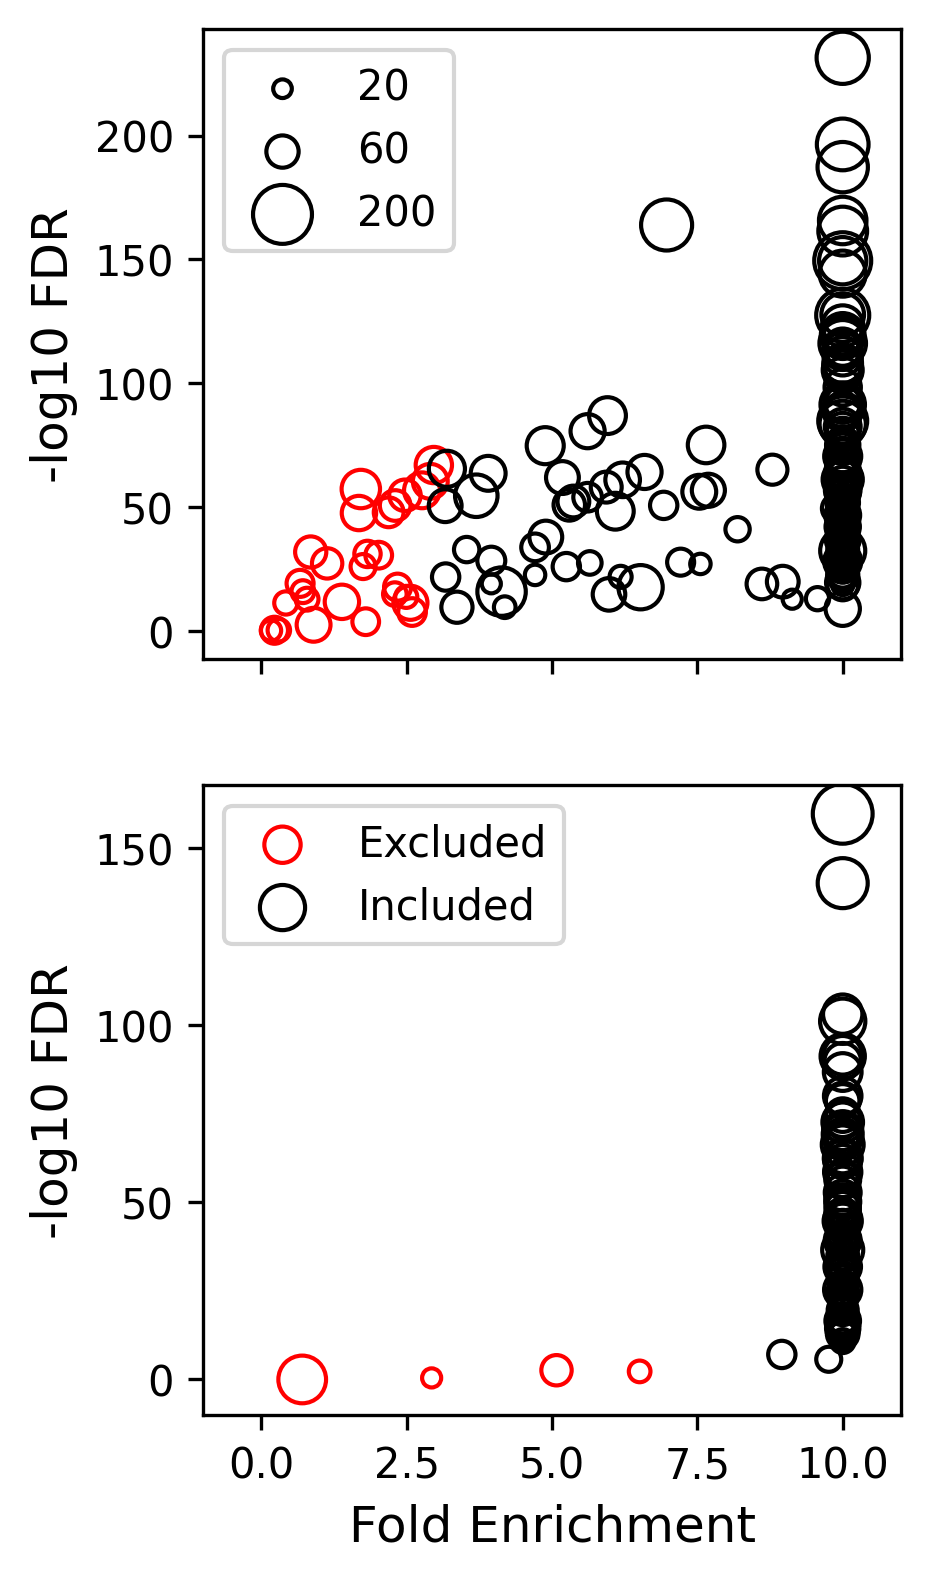

In [74]:
fig, axes = plt.subplots(2, 1, figsize=(3, 6), sharex='all', dpi=300)
ax = axes[0]
tmp = count.loc[(count['TargetGroup']=='IT'), ['IT_FDR_binom', 'IT_ratio', 'Total']]
sele = (tmp['IT_FDR_binom']<0.001) & (tmp['IT_ratio']>3)
# ax.plot(np.log2([8571/5274*3, 8571/5274*3]), [0,30], 'b--')
# ax.plot([-2,8], -np.log10([0.05, 0.05]), 'b--')
# tmpfilter = ~np.logical_and(fdr<0.05, (ratio/8571*5274)>3)
ax.scatter(tmp.loc[~sele, 'IT_ratio'], -np.log10(tmp.loc[~sele, 'IT_FDR_binom']), rasterized=True, 
           color='none', marker='o', s=tmp.loc[~sele, 'Total'], edgecolors='r', label='Excluded', zorder=50)
ax.scatter(tmp.loc[sele, 'IT_ratio'], -np.log10(tmp.loc[sele, 'IT_FDR_binom']), rasterized=True, 
           color='none', marker='o', s=tmp.loc[sele, 'Total'], edgecolors='k', label='Included', zorder=100)
# ax.set_xlabel('Fold Enrichment', fontsize=12)
ax.set_ylabel('-log10 FDR', fontsize=12)
# ax.legend(loc='upper left')
# ax = axes[1]
# ax.axis('off')
# ax.scatter([0,0,0,0], [0,10,20,30], s=[1,10,50,100], color='none', marker='o', edgecolors='k')
# for i in range(4):
# 	ax.text(-1, 10*i, str([1,10,50,100][i]), fontsize=12, verticalalignment='center', horizontalalignment='center')

# ax.set_xlim([-5,5])
markers = [
    plt.scatter([-2], [-2], facecolor='none', s=xx, marker="o", edgecolor='k')
    for xx in [20, 60, 200]
]
ax.legend(
    markers,
    [20, 60, 200],
    numpoints=1,
    ncol=1,
    markerscale=1,
    fontsize=10,
    # bbox_to_anchor=(1, 1),
    loc="upper left",
)

ax = axes[1]
tmp = count.loc[(count['TargetGroup']=='ET'), ['ET_FDR_binom', 'ET_ratio', 'Total']]
sele = (tmp['ET_FDR_binom']<0.001) & (tmp['ET_ratio']>8)
# ax.plot(np.log2([8571/5274*3, 8571/5274*3]), [0,30], 'b--')
# ax.plot([-2,8], -np.log10([0.05, 0.05]), 'b--')
# tmpfilter = ~np.logical_and(fdr<0.05, (ratio/8571*5274)>3)
ax.scatter(tmp.loc[~sele, 'ET_ratio'], -np.log10(tmp.loc[~sele, 'ET_FDR_binom']), rasterized=True, 
           color='none', marker='o', s=tmp.loc[~sele, 'Total'], edgecolors='r', label='Excluded', zorder=50)
ax.scatter(tmp.loc[sele, 'ET_ratio'], -np.log10(tmp.loc[sele, 'ET_FDR_binom']), rasterized=True, 
           color='none', marker='o', s=tmp.loc[sele, 'Total'], edgecolors='k', label='Included', zorder=100)
ax.set_xlabel('Fold Enrichment', fontsize=12)
ax.set_ylabel('-log10 FDR', fontsize=12)
ax.legend(loc='upper left')
ax.set_xlim([-1, 11])
# plt.tight_layout()
plt.savefig('/gale/netapp/entex/CEMBA_RS2/merged/plot/CTX_FANSQC_scatter.pdf', transparent=True)
# plt.close()


In [41]:
meta_ctx['PassTargetFilter'] = meta_ctx['Exp'].isin(selexp)


/gale/netapp/home/zhoujt/miniconda3/envs/scarches/lib/python3.7/site-packages/ipykernel-6.4.1-py3.7.egg/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
meta_ctx['PassTargetFilter'].sum() / meta_ctx.shape[0]

0.911364512752713

In [43]:
meta['PassTargetFilter'] = True
meta.loc[meta_ctx.index, 'PassTargetFilter'] = meta_ctx['PassTargetFilter'].values
print(meta['PassTargetFilter'].sum())

33034


/gale/netapp/home/zhoujt/miniconda3/envs/scarches/lib/python3.7/site-packages/ipykernel-6.4.1-py3.7.egg/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/gale/netapp/home/zhoujt/miniconda3/envs/scarches/lib/python3.7/site-packages/pandas-1.3.3-py3.7-linux-x86_64.egg/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [220]:
meta.loc[meta['PassTargetFilter'], 'Comb'].value_counts()


MOp>SSp      549
MRN>P        325
SSp>RSP      323
P>TH         319
SSp>SC       318
            ... 
ENT>MOp       22
PTLp>ENT      21
DGa>ENT       21
PIRa>PTLp     21
THm>ACA       21
Name: Comb, Length: 225, dtype: int64

In [6]:
source_meta = pd.read_csv('/gale/netapp/home/zhoujt/project/CEMBA/RS2/source_palette.tsv', index_col=0, sep='\t')
source_meta

,DissectionRegion,DissectionRegionColor,SubRegion,RegionGroup,SubRegionColor,MajorRegion,MajorRegionColor
ID,,,,,,,
3A,ACA-1,#9B7260,ACA,CTX,#8c564b,CTX,#176CDB
4A,ACA-2,#8c564b,ACA,CTX,#8c564b,CTX,#176CDB
5A,ACA-3,#5E4035,ACA,CTX,#8c564b,CTX,#176CDB
3D,AI,#A6D634,AI,CTX,#A6D634,CTX,#176CDB
7H8H9G,AMY,#508eda,AMY,AMY,#508eda,AMY,#508eda
9D,AUD-1,#de4885,AUD,CTX,#e193cd,CTX,#176CDB
10C,AUD-2,#e193cd,AUD,CTX,#e193cd,CTX,#176CDB
14B15B18A,CBX,#deb34c,CBX,CB,#deb34c,CB,#deb34c
10D11D12D13B,ENT,#d24ecd,ENT,RHP,#d24ecd,HPF,#d62728


In [7]:
meta = pd.read_csv(f'{indir}matrix/cell_48032_RS2_meta_nooutlier.csv.gz', index_col=0)
meta = meta.rename({'Slice':'DissectionRegion'}, axis=1)
meta['Source'] = meta['DissectionRegion'].map(source_meta['SubRegion'])
meta

,mCCCFrac,mCGFrac,mCHFrac,FinalmCReads,Plate,PlateNormReads,Exp,Source,DissectionRegion,Target,Sex,L1,L2,L3,L4,L1_annot,PassTargetFilter
cell,,,,,,,,,,,,,,,,,
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD001,0.006500,0.775850,0.032027,1090870.0,180117_P1,-0.555116,Tm3C,MOp,3C,SC,male,c14,c14_c6,c14_c6_c0,c14_c6_c0_c0,ET,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD002,0.006709,0.775146,0.034091,1458065.0,180117_P1,-0.136540,Tf3C,MOp,3C,SC,female,c14,c14_c5,c14_c5_c0,c14_c5_c0_c0,ET,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD004,0.007131,0.775895,0.035900,1614993.0,180117_P1,0.010933,Tm4B,MOp,4B,SC,male,c14,c14_c6,c14_c6_c1,c14_c6_c1_c0,ET,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD006,0.006032,0.773345,0.028591,1598778.0,180117_P1,-0.003626,Tf4B,MOp,4B,SC,female,c14,c14_c0,c14_c0_c0,c14_c0_c0_c1,ET,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD007,0.005007,0.773471,0.022022,762007.0,180117_P2,-1.169393,Pm3C,MOp,3C,STR,male,c1,c1_c1,c1_c1_c3,c1_c1_c3_c2,IT-Sup,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool180_Plate9-6-M14-O24,0.004759,0.737593,0.018632,1237195.0,Pool180_Plate9,0.305202,Zf10D11D12D13B,ENT,10D11D12D13B,PFC,female,c4,c4_c3,c4_c3_c1,c4_c3_c1_c2,OLF,True
Pool180_Plate9-6-M14-P11,0.005464,0.759072,0.024842,1103912.0,Pool180_Plate9,0.140754,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c4,c4_c4_c2,c4_c4_c2_c0,OLF,True
Pool180_Plate9-6-M14-P12,0.006196,0.792529,0.029565,818886.0,Pool180_Plate9,-0.290136,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c6,c4_c6_c1,c4_c6_c1_c0,OLF,True


In [10]:
meta['Source'].value_counts()

ACA     3265
MOp     2863
SSp     2809
AUD     2772
RSP     2694
HY      2542
PTLp    2534
VTA     2529
VIS     2406
AI      2314
ENT     2095
AMY     2003
THl     1433
MY      1419
THp     1415
PAG     1412
THm     1362
P       1227
MRN     1216
PAL     1082
PIRa     861
CAp      828
PIRp     664
SC       656
DGp      599
CAa      589
MOB      577
IC       477
DGa      421
AON      398
CBX      308
STR      262
Name: Source, dtype: int64

In [13]:
data = meta.loc[meta['PassTargetFilter'], ['Source','Target']].value_counts().unstack().loc[rs2_subregion_dict.keys(), tarall].fillna(0)
# data = meta[['Source','Target']].value_counts().unstack().loc[rs2_subregion_dict.keys(), tarall].fillna(0)
data


Target,PFC,MOp,SSp,ACA,AI,AUDp,RSP,PTLp,VISp,ENT,...,STR,PAL,TH,HY,SC,VTA,P,MY,CBN,CBX
Source,,,,,,,,,,,,,,,,,,,,,
MOp,0.0,0.0,549.0,275.0,137.0,195.0,0.0,0.0,0.0,0.0,...,253.0,0.0,236.0,0.0,304.0,256.0,267.0,96.0,0.0,0.0
SSp,0.0,253.0,0.0,259.0,0.0,156.0,323.0,181.0,0.0,0.0,...,43.0,0.0,206.0,0.0,318.0,65.0,250.0,150.0,0.0,0.0
ACA,187.0,120.0,46.0,0.0,178.0,190.0,289.0,241.0,244.0,0.0,...,187.0,0.0,137.0,0.0,216.0,229.0,213.0,0.0,0.0,0.0
AI,83.0,55.0,242.0,216.0,0.0,129.0,181.0,58.0,252.0,0.0,...,139.0,0.0,80.0,41.0,193.0,0.0,206.0,47.0,0.0,0.0
AUD,0.0,166.0,143.0,213.0,0.0,0.0,191.0,221.0,227.0,0.0,...,169.0,0.0,175.0,0.0,252.0,0.0,259.0,0.0,0.0,0.0
RSP,0.0,58.0,55.0,238.0,0.0,176.0,0.0,175.0,207.0,27.0,...,0.0,0.0,123.0,0.0,266.0,0.0,184.0,0.0,0.0,0.0
PTLp,0.0,137.0,150.0,177.0,0.0,300.0,251.0,0.0,189.0,21.0,...,110.0,0.0,181.0,0.0,231.0,0.0,177.0,45.0,0.0,0.0
VIS,0.0,0.0,62.0,246.0,0.0,222.0,223.0,190.0,0.0,0.0,...,163.0,0.0,219.0,0.0,258.0,0.0,253.0,0.0,0.0,0.0
ENT,271.0,22.0,0.0,219.0,0.0,0.0,157.0,166.0,0.0,0.0,...,126.0,0.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
tar2source = {xx:yy for xx,yy in zip(
    ['MOp', 'SSp', 'ACA', 'AI', 'AUDp', 'RSP', 'PTLp', 'VISp', 
     'ENT', 'HPF', 'MOB', 'PIR', 'AMY', 'STR', 'PAL', 
     'TH', 'HY', 'SC', 'VTA', 'P', 'MY', 'CBX'],
    [['MOp'], ['SSp'], ['ACA'], ['AI'], ['AUD'], ['RSP'], ['PTLp'], ['VIS'], 
     ['ENT'], ['CAa', 'CAp', 'DGa', 'DGp'], ['MOB', 'AON'], ['PIRa', 'PIRp'], ['AMY'], ['STR'], ['PAL'], 
     ['THm', 'THl', 'THp'], ['HY'], ['SC'], ['MRN', 'VTA', 'PAG', 'IC'], ['P'], ['MY'], ['CBX']])
}

In [40]:
tarcolor = {xx:yy for xx,yy in zip(tarall, sns.color_palette('hls', len(tarall)))}
rcolor = source_meta[['SubRegion','SubRegionColor']].drop_duplicates().set_index('SubRegion').loc[data.index, 'SubRegionColor']
ccolor = data.columns.map(tarcolor)
groupmap = source_meta[['SubRegion', 'MajorRegion', 'MajorRegionColor']].drop_duplicates().set_index('SubRegion')
rename_tar = {'PFC':'MOp', 'AUDp':'MOp', 'VISp':'MOp', 'HPF':'CAa', 'PIR':'PIRa', 'TH':'THp', 'CBN':'CBX'}
for xx in rename_tar:
    groupmap.loc[xx] = groupmap.loc[rename_tar[xx]].values
    
rgcolor = groupmap.loc[data.index]
cgcolor = groupmap.loc[data.columns]


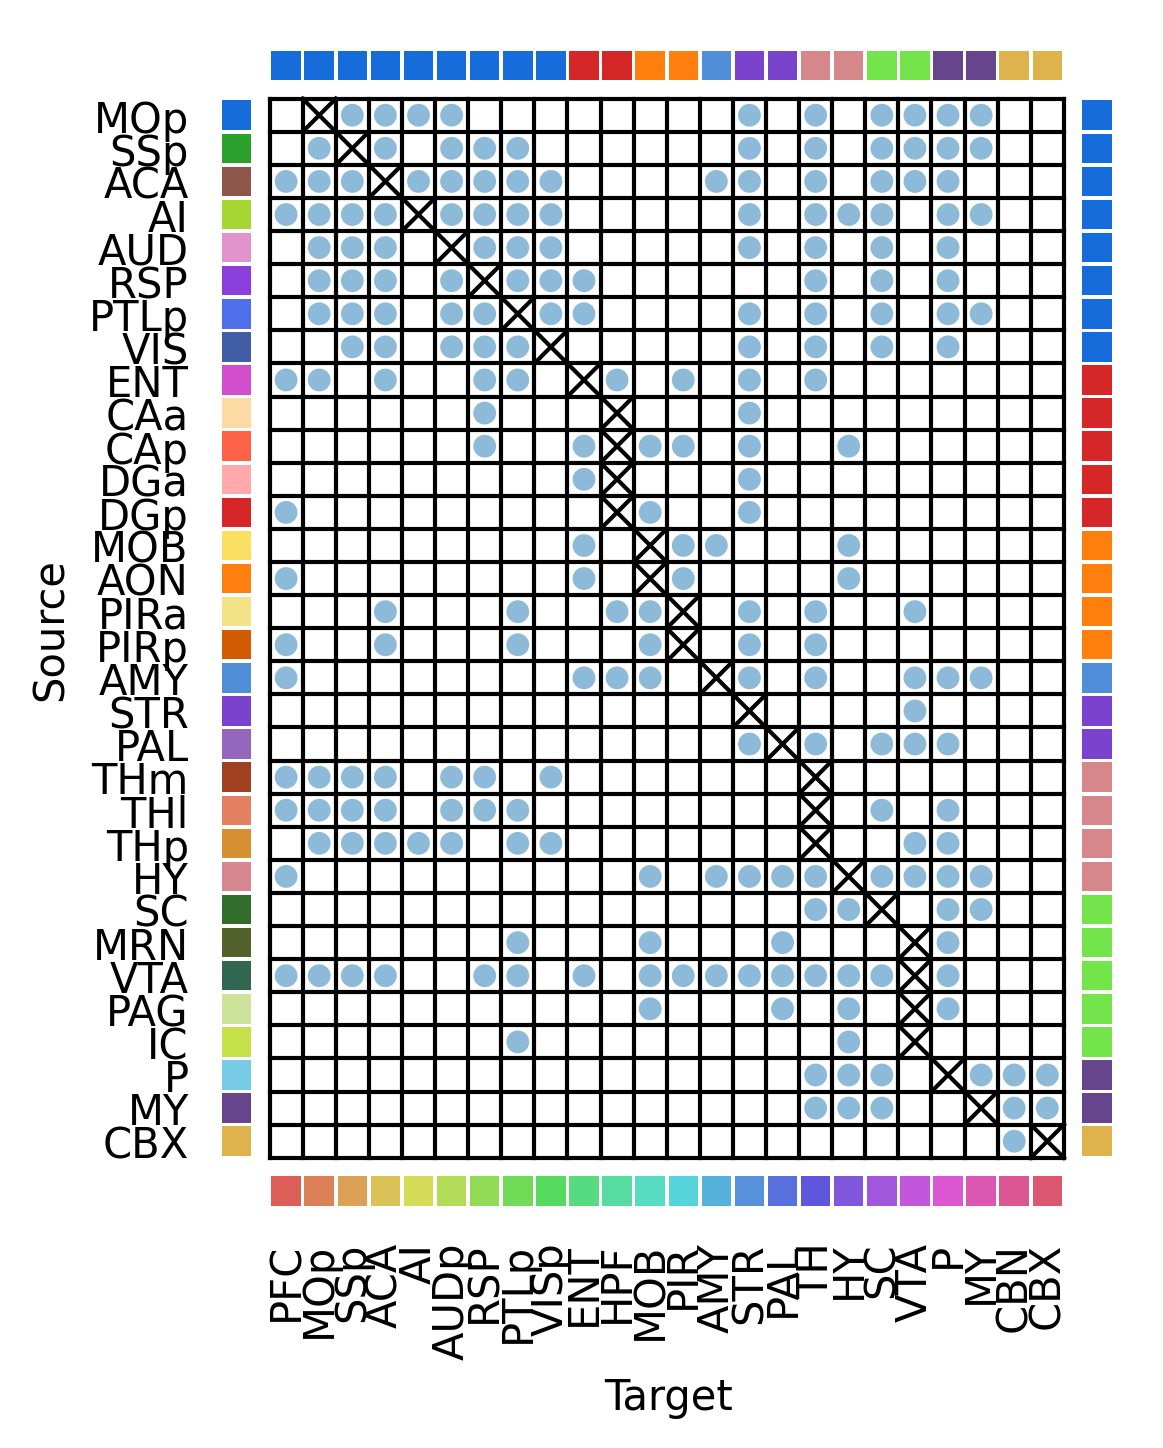

In [50]:
lw = 1
fig, ax = plt.subplots(figsize=(4,6), dpi=300)
# sns.heatmap(data>0, ax=ax, cmap='bwr_r', vmin=-2, vmax=2)
nrow, ncol = data.shape
for i in range(nrow+1):
    ax.plot([0, ncol], [i,i], 'k', linewidth=lw)
for i in range(ncol+1):
    ax.plot([i,i], [0, nrow], 'k', linewidth=lw)
    
ax.tick_params(axis='both', length=0)

ridx = {xx:i for i,xx in enumerate(data.index)}
cidx = {xx:i for i,xx in enumerate(data.columns)}
for xx in tar2source:
    for yy in tar2source[xx]:
        ax.plot([cidx[xx], cidx[xx]+1], [ridx[yy], ridx[yy]+1], 'k', linewidth=lw)
        ax.plot([cidx[xx], cidx[xx]+1], [ridx[yy]+1, ridx[yy]], 'k', linewidth=lw)

ridx, cidx = np.where(data>0)
ax.scatter(cidx+0.5, ridx+0.5, marker='o', edgecolor='none', s=30, alpha=0.5)
ax.axis('square')
# ax.invert_yaxis()
ax.set_xlim([-2, ncol+2+0.1])
ax.set_ylim([nrow+2.1, -2.1])
ax.set(frame_on=False)
ax.set_xticks(np.arange(ncol)+0.5)
ax.set_yticks(np.arange(nrow)+0.5)
ax.set_xticklabels(data.columns, rotation=90, ha='center')
ax.set_yticklabels(data.index)
ax.set_xlabel('Target', fontsize=10)
ax.set_ylabel('Source', fontsize=10)
ax.scatter(-np.ones(nrow), 0.5+np.arange(nrow), c=rcolor, 
           marker='s', edgecolor='none', s=50, alpha=1.0)
ax.scatter(ncol*np.ones(nrow) + 1, 0.5+np.arange(nrow), c=rgcolor['MajorRegionColor'].values, 
           marker='s', edgecolor='none', s=50, alpha=1.0)

ax.scatter(np.arange(ncol) + 0.5, (nrow+1) * np.ones(ncol), c=ccolor, 
           marker='s', edgecolor='none', s=50, alpha=1.0)
ax.scatter(np.arange(ncol) + 0.5, -1*np.ones(ncol), c=cgcolor['MajorRegionColor'].values, 
           marker='s', edgecolor='none', s=50, alpha=1.0)

plt.savefig(f'{indir}/plot/projection_map.pdf', transparent=True)



In [55]:
print(len(ridx), np.sum(meta['PassTargetFilter']))

225 33034


In [53]:
meta.to_csv(f'{indir}matrix/cell_48032_RS2_meta_nooutlier.csv.gz')

Text(0, 0.5, 'Source')

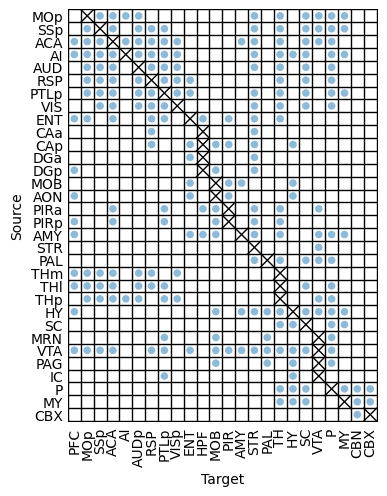

In [223]:
lw = 1
fig, ax = plt.subplots(figsize=(4,6))
# sns.heatmap(data>0, ax=ax, cmap='bwr_r', vmin=-2, vmax=2)
nrow, ncol = data.shape
for i in range(nrow+1):
    ax.plot([0, ncol], [i,i], 'k', linewidth=lw)
for i in range(ncol+1):
    ax.plot([i,i], [0, nrow], 'k', linewidth=lw)
    
ax.tick_params(axis='both', length=0)

ridx = {xx:i for i,xx in enumerate(data.index)}
cidx = {xx:i for i,xx in enumerate(data.columns)}
for xx in tar2source:
    for yy in tar2source[xx]:
        ax.plot([cidx[xx], cidx[xx]+1], [ridx[yy], ridx[yy]+1], 'k', linewidth=lw)
        ax.plot([cidx[xx], cidx[xx]+1], [ridx[yy]+1, ridx[yy]], 'k', linewidth=lw)

ridx, cidx = np.where(data>0)
ax.scatter(cidx+0.5, ridx+0.5, marker='o', edgecolor='none', s=30, alpha=0.5)
ax.axis('square')
# ax.invert_yaxis()
ax.set_xlim([0, ncol+0.1])
ax.set_ylim([nrow+0.1, 0])
ax.set(frame_on=False)
ax.set_xticks(np.arange(ncol)+0.5)
ax.set_yticks(np.arange(nrow)+0.5)
ax.set_xticklabels(data.columns, rotation=90, ha='center')
ax.set_yticklabels(data.index)
ax.set_xlabel('Target', fontsize=10)
ax.set_ylabel('Source', fontsize=10)


In [ ]:
selc = meta[meta['PassTargetFilter']].index


In [231]:
meta = metaall.loc[metaall['Study']=='CEMBA_EpiRetro', 
                   ['mCCCFrac', 'mCGFrac', 'mCHFrac', 
                    'FinalmCReads', 'Plate', 'PlateNormReads', 
                    'Exp', 'Source', 'Slice', 'Target','Gender', 
                    'L1', 'L2', 'L3', 'L4', 'L1_annot']]
meta['PassTargetFilter'] = False
meta.loc[selc, 'PassTargetFilter'] = True
meta = meta.rename({'Gender':'Sex'}, axis=1)
meta


,mCCCFrac,mCGFrac,mCHFrac,FinalmCReads,Plate,PlateNormReads,Exp,Source,Slice,Target,Sex,L1,L2,L3,L4,L1_annot,PassTargetFilter
cell,,,,,,,,,,,,,,,,,
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD001,0.006500,0.775850,0.032027,1090870.0,180117_P1,-0.555116,Tm3C,MOp,3C,SC,male,c14,c14_c6,c14_c6_c0,c14_c6_c0_c0,ET,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD002,0.006709,0.775146,0.034091,1458065.0,180117_P1,-0.136540,Tf3C,MOp,3C,SC,female,c14,c14_c5,c14_c5_c0,c14_c5_c0_c0,ET,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD004,0.007131,0.775895,0.035900,1614993.0,180117_P1,0.010933,Tm4B,MOp,4B,SC,male,c14,c14_c6,c14_c6_c1,c14_c6_c1_c0,ET,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD006,0.006032,0.773345,0.028591,1598778.0,180117_P1,-0.003626,Tf4B,MOp,4B,SC,female,c14,c14_c0,c14_c0_c0,c14_c0_c0_c1,ET,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD007,0.005007,0.773471,0.022022,762007.0,180117_P2,-1.169393,Pm3C,MOp,3C,STR,male,c1,c1_c1,c1_c1_c3,c1_c1_c3_c2,IT-Sup,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool180_Plate9-6-M14-O24,0.004759,0.737593,0.018632,1237195.0,Pool180_Plate9,0.305202,Zf10D11D12D13B,ENT,10D11D12D13B,PFC,female,c4,c4_c3,c4_c3_c1,c4_c3_c1_c2,OLF,True
Pool180_Plate9-6-M14-P11,0.005464,0.759072,0.024842,1103912.0,Pool180_Plate9,0.140754,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c4,c4_c4_c2,c4_c4_c2_c0,OLF,True
Pool180_Plate9-6-M14-P12,0.006196,0.792529,0.029565,818886.0,Pool180_Plate9,-0.290136,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c6,c4_c6_c1,c4_c6_c1_c0,OLF,True


In [243]:
tmp = meta[meta['PassTargetFilter']]
tmp['Comb'] = tmp['Source'] + '>' + tmp['Target']
count = tmp[['Comb', 'Sex']].value_counts()
count

/gale/netapp/home/zhoujt/miniconda3/envs/scarches/lib/python3.7/site-packages/ipykernel-6.4.1-py3.7.egg/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Comb      Sex   
MB>P      male      430
          female    411
MOp>SSp   male      282
          female    267
SSp>RSP   male      239
                   ... 
PIR>TH    male       22
ENT>MOp   female     22
PAL>SC    female     22
PTLp>ENT  male       21
AI>PFC    female     21
Length: 335, dtype: int64

In [245]:
tmp[['Comb','Sex']].drop_duplicates()['Comb'].value_counts().value_counts()

2    147
1     41
Name: Comb, dtype: int64

In [241]:
meta.to_csv(f'{indir}matrix/cell_48032_RS2_meta_nooutlier.csv.gz')


In [10]:
meta = pd.read_csv(f'{indir}matrix/cell_48032_RS2_meta_nooutlier.csv.gz', index_col=0, header=0)
meta

,mCCCFrac,mCGFrac,mCHFrac,FinalmCReads,Plate,PlateNormReads,Exp,Source,DissectionRegion,Target,Sex,L1,L2,L3,L4,L1_annot,PassTargetFilter
cell,,,,,,,,,,,,,,,,,
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD001,0.006500,0.775850,0.032027,1090870.0,180117_P1,-0.555116,Tm3C,MOp,3C,SC,male,c14,c14_c6,c14_c6_c0,c14_c6_c0_c0,ET,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD002,0.006709,0.775146,0.034091,1458065.0,180117_P1,-0.136540,Tf3C,MOp,3C,SC,female,c14,c14_c5,c14_c5_c0,c14_c5_c0_c0,ET,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD004,0.007131,0.775895,0.035900,1614993.0,180117_P1,0.010933,Tm4B,MOp,4B,SC,male,c14,c14_c6,c14_c6_c1,c14_c6_c1_c0,ET,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD006,0.006032,0.773345,0.028591,1598778.0,180117_P1,-0.003626,Tf4B,MOp,4B,SC,female,c14,c14_c0,c14_c0_c0,c14_c0_c0_c1,ET,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD007,0.005007,0.773471,0.022022,762007.0,180117_P2,-1.169393,Pm3C,MOp,3C,STR,male,c1,c1_c1,c1_c1_c3,c1_c1_c3_c2,IT-Sup,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool180_Plate9-6-M14-O24,0.004759,0.737593,0.018632,1237195.0,Pool180_Plate9,0.305202,Zf10D11D12D13B,ENT,10D11D12D13B,PFC,female,c4,c4_c3,c4_c3_c1,c4_c3_c1_c2,OLF,True
Pool180_Plate9-6-M14-P11,0.005464,0.759072,0.024842,1103912.0,Pool180_Plate9,0.140754,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c4,c4_c4_c2,c4_c4_c2_c0,OLF,True
Pool180_Plate9-6-M14-P12,0.006196,0.792529,0.029565,818886.0,Pool180_Plate9,-0.290136,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c6,c4_c6_c1,c4_c6_c1_c0,OLF,True


In [11]:
meta = meta[meta['PassTargetFilter']]
meta['Exp'].unique().shape

(487,)

In [81]:
meta

,mCCCFrac,mCGFrac,mCHFrac,FinalmCReads,Plate,Exp,Source,Slice,Target,Gender,L1,L2,L3,L4,L1_annot,PlateNormReads,Comb,PassTargetFilter
cell,,,,,,,,,,,,,,,,,,
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD001,0.006500,0.775850,0.032027,1090870.0,180117_P1,Tm3C,MOp,3C,SC,male,c14,c14_c6,c14_c6_c0,c14_c6_c0_c0,ET,-0.555116,MOp>SC,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD002,0.006709,0.775146,0.034091,1458065.0,180117_P1,Tf3C,MOp,3C,SC,female,c14,c14_c5,c14_c5_c0,c14_c5_c0_c0,ET,-0.136540,MOp>SC,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD004,0.007131,0.775895,0.035900,1614993.0,180117_P1,Tm4B,MOp,4B,SC,male,c14,c14_c6,c14_c6_c1,c14_c6_c1_c0,ET,0.010933,MOp>SC,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD006,0.006032,0.773345,0.028591,1598778.0,180117_P1,Tf4B,MOp,4B,SC,female,c14,c14_c0,c14_c0_c0,c14_c0_c0_c1,ET,-0.003626,MOp>SC,True
180118_CEMBA_mm_P56_P63_RS2_180117_P1_180117_P2_A10_AD007,0.005007,0.773471,0.022022,762007.0,180117_P2,Pm3C,MOp,3C,STR,male,c1,c1_c1,c1_c1_c3,c1_c1_c3_c2,IT-Sup,-1.169393,MOp>STR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool180_Plate9-6-M14-O24,0.004759,0.737593,0.018632,1237195.0,Pool180_Plate9,Zf10D11D12D13B,ENT,10D11D12D13B,PFC,female,c4,c4_c3,c4_c3_c1,c4_c3_c1_c2,OLF,0.305202,ENT>PFC,True
Pool180_Plate9-6-M14-P11,0.005464,0.759072,0.024842,1103912.0,Pool180_Plate9,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c4,c4_c4_c2,c4_c4_c2_c0,OLF,0.140754,ENT>PFC,True
Pool180_Plate9-6-M14-P12,0.006196,0.792529,0.029565,818886.0,Pool180_Plate9,Zm10D11D12D13B,ENT,10D11D12D13B,PFC,male,c4,c4_c6,c4_c6_c1,c4_c6_c1_c0,OLF,-0.290136,ENT>PFC,True


In [85]:
meta.loc[meta['PassTargetFilter'], ['Comb','Gender']].value_counts().reset_index()['Comb'].value_counts().value_counts()

2    168
1     57
Name: Comb, dtype: int64